In [2]:
# import os
# os.environ["FIFTYONE_DATASET_ZOO_DIR"] = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/fiftyone"
# os.environ["http_proxy"]="http://127.0.0.1:7890"
# os.environ["https_proxy"]="http://127.0.0.1:7890"
# import fiftyone as fo
# import fiftyone.zoo as foz

# dataset = foz.load_zoo_dataset(
#     "open-images-v7",
#     split="validation",
#     label_types=[],
#     # max_samples=100,
# )

import fiftyone as fo
import fiftyone.zoo as foz
import os
import pdb

os.environ["FIFTYONE_DATASET_ZOO_DIR"] = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/fiftyone"
name = 'open-images-v7'
dataset = foz.load_zoo_dataset(name,
    split="validation",
    dataset_dir="/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/fiftyone/open-images-v7",
    max_samples=1000,
    shuffle=True
    # classes=["Human body"],
)

Necessary images already downloaded
Existing download of split 'validation' is sufficient
Loading 'open-images-v7' split 'validation'
 100% |███████████████| 1000/1000 [1.3m elapsed, 0s remaining, 13.8 samples/s]      
Dataset 'open-images-v7-validation-1000' created


In [2]:
len(dataset)

2000

In [3]:
a = iter(dataset)

In [4]:
from PIL import Image
import numpy as np
sys.path.append("../ControlNet")
os.environ["http_proxy"]="http://127.0.0.1:7890"
os.environ["https_proxy"]="http://127.0.0.1:7890"
# from annotator.openpose import OpenposeDetector
from annotator.hed import HEDdetector
from transformers import pipeline
from annotator.util import HWC3
model = HEDdetector()

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")
# for data in dataset:
#     img_raw = Image.open(data["filepath"])
#     img = np.array(img_raw)
#     img = HWC3(img)
#     control, meta = model(img)
#     control = Image.fromarray(control)
#     print(meta)
#     break


In [9]:
image_dir = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/open-images/val/images"
hed_dir = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/open-images/val/hed"
depth_dir = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/open-images/val/depth"

os.makedirs(image_dir, exist_ok=True)
os.makedirs(hed_dir, exist_ok=True)
os.makedirs(depth_dir, exist_ok=True)

In [6]:
from utils.dataset import process_frames

In [13]:
from tqdm import tqdm
import torch
import torchvision.transforms as T
iter_dataset = iter(dataset)

# file_cnt = tqdm(range(1000))

for data in tqdm(iter_dataset):
    img_raw = Image.open(data["filepath"])
    img_processed = process_frames([img_raw], h = 512, w = 512)[0]
    img = np.array(img_processed)
    img = HWC3(img)
    control = model(img)
    control = Image.fromarray(control)
    # 
    name = os.path.basename(data["filepath"])
    img_processed.save(os.path.join(image_dir, name))
    control.save(os.path.join(hed_dir, name))

    depth_tensor = pipe(img_processed)["predicted_depth"]
    depth_tensor = torch.nn.functional.interpolate(
        depth_tensor.unsqueeze(1),
        size=img_processed.size[::-1],
        mode="bilinear",
        align_corners=False,
    )[0]


    depth_tensor = (depth_tensor - depth_tensor.min()) / (depth_tensor.max() - depth_tensor.min()) * 255.0
    depth_tensor = depth_tensor.to(torch.uint8)
    gray_depth = T.ToPILImage()(depth_tensor)
    gray_depth.save(os.path.join(depth_dir, name))

    # print("Len subset:", len(meta["subset"]))
    # subset, candidate = np.array(meta["subset"]), np.array(meta["candidate"])

    # mean_sum = 0
    # for n in range(len(subset)):
    #     cnt = 0
    #     cnt_sum = 0
    #     for index in subset[n][:17]:
    #         if -1 == index:
    #             continue
    #         score = candidate[index.astype(int), 2]
    #         cnt_sum += score
    #         cnt += 1
    #     # print(cnt_sum / cnt)
    #     mean_sum += cnt_sum / cnt

    # if len(subset) != 0 and mean_sum / len(subset) > 0.5:
    #     img_processed.save(os.path.join(image_dir, name))
    #     control.save(os.path.join(control_dir, name))
    #     file_cnt.update(1)
    #     file_cnt.refresh()

    
    # if file_cnt.n >= 1000:
    #     break


1000it [08:47,  1.90it/s]


In [114]:
meta

{'candidate': [[458.0, 0.0, 0.7351038455963135, 0.0],
  [400.0, 46.0, 0.8630968332290649, 1.0],
  [342.0, 35.0, 0.8202399015426636, 2.0],
  [280.0, 123.0, 0.6537603139877319, 3.0],
  [325.0, 150.0, 0.5963391065597534, 4.0],
  [458.0, 57.0, 0.815970778465271, 5.0],
  [459.0, 146.0, 0.35818415880203247, 6.0],
  [339.0, 202.0, 0.33511993288993835, 7.0],
  [415.0, 209.0, 0.31405600905418396, 8.0],
  [453.0, 0.0, 0.45927971601486206, 9.0],
  [466.0, 0.0, 0.3638588786125183, 10.0],
  [425.0, 0.0, 0.21468394994735718, 11.0]],
 'subset': [[0.0,
   1.0,
   2.0,
   3.0,
   4.0,
   5.0,
   6.0,
   -1.0,
   7.0,
   -1.0,
   -1.0,
   8.0,
   -1.0,
   -1.0,
   9.0,
   10.0,
   11.0,
   -1.0,
   13.31133535536925,
   12.0]]}

In [73]:
limbSeq = [[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], \
            [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], \
            [1, 16], [16, 18], [3, 17], [6, 18]]

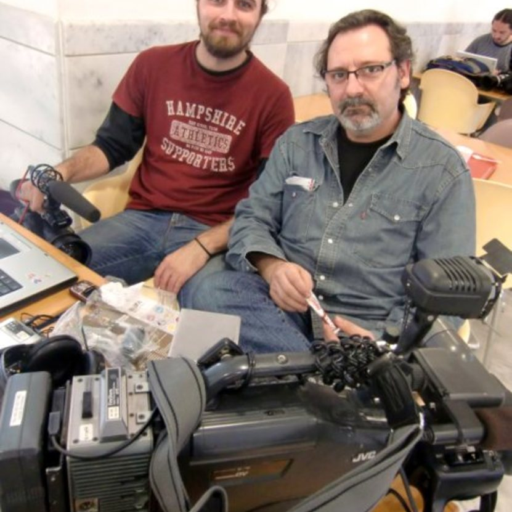

In [39]:
img_processed

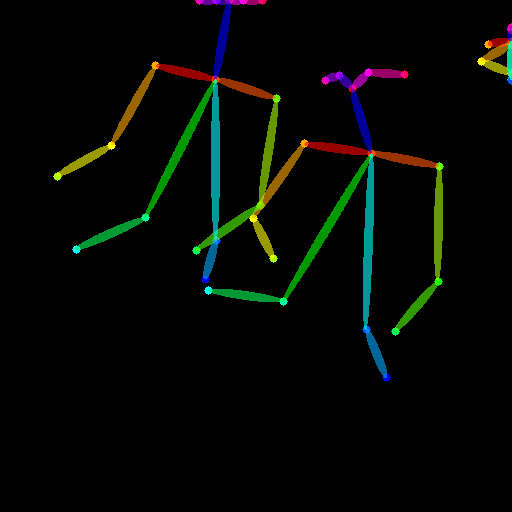

In [40]:
control

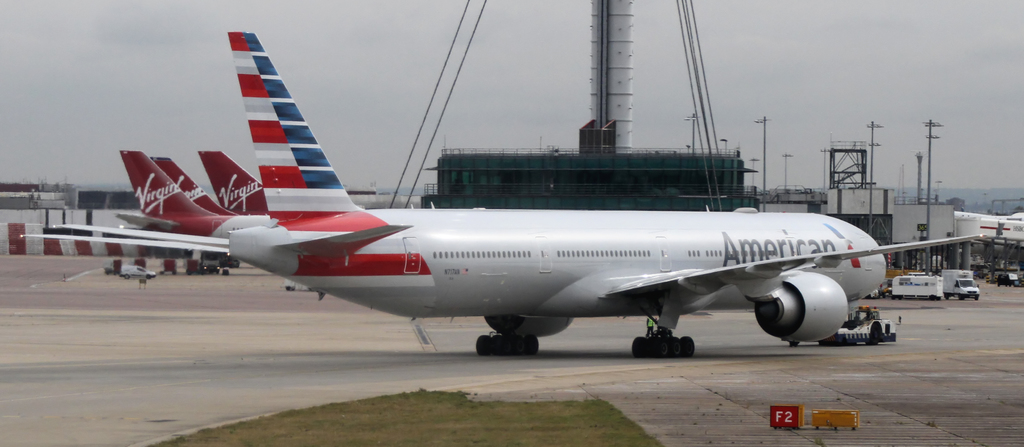

In [14]:
from PIL import Image
Image.open("/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/fiftyone/open-images-v7/validation/data/0001eeaf4aed83f9.jpg")

In [1]:
# json_path = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/fiftyone/open-images-v7/validation/labels/open_images_validation_localized_narratives.jsonl"
# lines = []
# with open(json_path, "r") as f:
#     json_lines = f.readlines()
#     for json_line in json_lines:
#         lines.append(json.loads(json_line))


{'dataset_id': 'open_image',
 'image_id': 'abe9ff8763cdcc5d',
 'annotator_id': 110,
 'caption': 'In this image we can see two people and a person on the left side holding a glass and there are many bottles on the shelves.',
 'timed_caption': [{'utterance': 'In this',
   'start_time': 0.0,
   'end_time': 0.7},
  {'utterance': 'image', 'start_time': 0.7, 'end_time': 0.9},
  {'utterance': 'we', 'start_time': 0.9, 'end_time': 1.1},
  {'utterance': 'can', 'start_time': 1.1, 'end_time': 1.4},
  {'utterance': 'see', 'start_time': 1.4, 'end_time': 1.5},
  {'utterance': 'two', 'start_time': 1.5, 'end_time': 1.8},
  {'utterance': 'people', 'start_time': 1.8, 'end_time': 2.5},
  {'utterance': 'and', 'start_time': 2.5, 'end_time': 3.2},
  {'utterance': 'a', 'start_time': 3.2, 'end_time': 3.2},
  {'utterance': 'person', 'start_time': 3.2, 'end_time': 3.6},
  {'utterance': 'on', 'start_time': 3.6, 'end_time': 3.9},
  {'utterance': 'the', 'start_time': 3.9, 'end_time': 4.1},
  {'utterance': 'left', '